# Criando os Nomes

In [33]:
import pandas as pd

In [10]:
nome_f = pd.read_json('http://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nome_m = pd.read_json('http://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')

In [12]:
print('Quantidade de nomes: ' + str(len(nome_f) + len(nome_m)))

Quantidade de nomes: 400


In [13]:
frames = [nome_f, nome_m]

In [15]:
nomes = pd.concat(frames)['nome'].to_frame()

In [17]:
nomes.sample(5)

,nome
83,RENAN
170,ALEXANDRO
48,RENATO
97,OSVALDO
47,LUCIA


# Incluindo ID dos Alunos

In [20]:
import numpy as np
np.random.seed(123)

In [21]:
total_alunos = len(nomes)
total_alunos

400

In [115]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [23]:
nomes.sample(5)

,nome,ID_Aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [28]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['Domínio'] = np.random.choice(dominios, total_alunos)

In [29]:
nomes.sample(5)

,nome,ID_Aluno,dominio,Email,Domínio
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br,@dominiodoemail.com.br
2,ANTONIO,205,@dominiodoemail.com.br,antonio@dominiodoemail.com.br,@servicodoemail.com
97,BARBARA,201,@servicodoemail.com,barbara@servicodoemail.com,@dominiodoemail.com.br
17,FELIPE,113,@servicodoemail.com,felipe@servicodoemail.com,@servicodoemail.com
97,OSVALDO,110,@servicodoemail.com,osvaldo@servicodoemail.com,@servicodoemail.com


In [26]:
nomes['Email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [27]:
nomes.sample(5)

,nome,ID_Aluno,dominio,Email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,@servicodoemail.com,daiane@servicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a Tabela Cursos

In [30]:
!pip3 install html5lib
!pip3 install lxml

In [31]:
import html5lib

In [35]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [36]:
 type(cursos)

list

In [38]:
cursos = cursos[0]

In [39]:
type(cursos)

pandas.core.frame.DataFrame

In [40]:
cursos.head(10)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


# Alterando o Index de Cursos

In [42]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [43]:
cursos.head(10)

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [44]:
cursos['ID'] = cursos.index + 1 

In [45]:
cursos.head(10)

,nome_do_curso,ID
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [47]:
cursos = cursos.set_index('ID')

In [48]:
cursos.head(10)

,nome_do_curso
ID,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Matriculando os Alunos nos Cursos

In [49]:
nomes.sample(10)

,nome,ID_Aluno,dominio,Email,Domínio
5,JULIANA,310,@servicodoemail.com,juliana@servicodoemail.com,@dominiodoemail.com.br
80,EMERSON,373,@dominiodoemail.com.br,emerson@dominiodoemail.com.br,@dominiodoemail.com.br
156,VALDEMAR,119,@dominiodoemail.com.br,valdemar@dominiodoemail.com.br,@servicodoemail.com
113,ROBERTA,143,@dominiodoemail.com.br,roberta@dominiodoemail.com.br,@dominiodoemail.com.br
15,LETICIA,347,@dominiodoemail.com.br,leticia@dominiodoemail.com.br,@servicodoemail.com
3,ANTONIA,156,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,@servicodoemail.com
24,CLAUDIA,16,@servicodoemail.com,claudia@servicodoemail.com,@dominiodoemail.com.br
96,TANIA,211,@servicodoemail.com,tania@servicodoemail.com,@servicodoemail.com
82,SOLANGE,7,@dominiodoemail.com.br,solange@dominiodoemail.com.br,@dominiodoemail.com.br
152,LARA,160,@dominiodoemail.com.br,lara@dominiodoemail.com.br,@dominiodoemail.com.br


In [61]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [65]:
nomes.sample(10)

,nome,ID_Aluno,dominio,Email,Domínio,matriculas
173,GERALDA,314,@servicodoemail.com,geralda@servicodoemail.com,@dominiodoemail.com.br,1
45,ADRIANO,196,@servicodoemail.com,adriano@servicodoemail.com,@dominiodoemail.com.br,2
8,LUIZ,208,@servicodoemail.com,luiz@servicodoemail.com,@dominiodoemail.com.br,3
23,LARISSA,173,@servicodoemail.com,larissa@servicodoemail.com,@servicodoemail.com,3
63,ERICA,228,@servicodoemail.com,erica@servicodoemail.com,@servicodoemail.com,1
127,TAINA,79,@servicodoemail.com,taina@servicodoemail.com,@servicodoemail.com,1
80,EMERSON,373,@dominiodoemail.com.br,emerson@dominiodoemail.com.br,@dominiodoemail.com.br,1
186,INES,319,@servicodoemail.com,ines@servicodoemail.com,@dominiodoemail.com.br,1
54,REGINA,281,@dominiodoemail.com.br,regina@dominiodoemail.com.br,@servicodoemail.com,2
44,GERALDO,318,@dominiodoemail.com.br,geraldo@dominiodoemail.com.br,@servicodoemail.com,2


In [63]:
nomes.matriculas.describe()

count    400.00000
mean       2.00000
std        1.36736
min        1.00000
25%        1.00000
50%        2.00000
75%        3.00000
max       14.00000
Name: matriculas, dtype: float64

In [66]:
import seaborn as sns

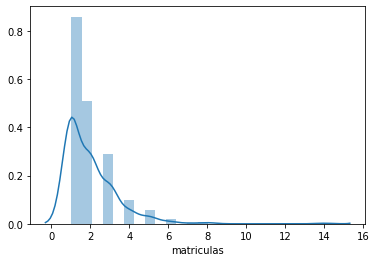

In [67]:
sns.distplot(nomes.matriculas)

In [68]:
nomes.matriculas.value_counts()

1     186
2     110
3      63
4      21
5      12
6       4
8       2
14      1
7       1
Name: matriculas, dtype: int64

# Selecionando Cursos

In [69]:
nomes.sample(5)

,nome,ID_Aluno,dominio,Email,Domínio,matriculas
58,DAVI,131,@servicodoemail.com,davi@servicodoemail.com,@dominiodoemail.com.br,3
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br,@servicodoemail.com,1
142,RAISSA,286,@servicodoemail.com,raissa@servicodoemail.com,@servicodoemail.com,3
152,LARA,160,@dominiodoemail.com.br,lara@dominiodoemail.com.br,@dominiodoemail.com.br,2
124,CESAR,2,@dominiodoemail.com.br,cesar@dominiodoemail.com.br,@servicodoemail.com,2


In [70]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [71]:
for index, row in nomes.iterrows():
    ID = row.ID_Aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [ID, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [72]:
matriculas.head(5)

,id_aluno,id_curso
0,235,4
1,43,16
2,43,2
3,304,18
4,156,16


In [75]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno': 'quantidade_alunos'})

,quantidade_alunos,nome_do_curso
id_curso,,
1,53,Lógica de programação
2,49,Java para Web
3,44,C# para Web
4,63,Ruby on Rails
5,9,Cursos de Python
6,47,PHP com MySql
7,20,.NET para web
8,27,Novas integrações com Java
9,39,TDD com Java


In [76]:
nomes.sample(5)

,nome,ID_Aluno,dominio,Email,Domínio,matriculas
18,VANESSA,42,@dominiodoemail.com.br,vanessa@dominiodoemail.com.br,@dominiodoemail.com.br,1
9,MARCOS,390,@servicodoemail.com,marcos@servicodoemail.com,@dominiodoemail.com.br,2
40,SERGIO,139,@servicodoemail.com,sergio@servicodoemail.com,@servicodoemail.com,2
100,JOEL,194,@dominiodoemail.com.br,joel@dominiodoemail.com.br,@dominiodoemail.com.br,1
157,CONCEICAO,153,@dominiodoemail.com.br,conceicao@dominiodoemail.com.br,@servicodoemail.com,4


In [77]:
cursos.head(5)

,nome_do_curso
ID,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [78]:
matriculas.head(5)

,id_aluno,id_curso
0,235,4
1,43,16
2,43,2
3,304,18
4,156,16


In [79]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno': 'quantidade_alunos'})

In [81]:
matriculas_por_curso.head(5)

,quantidade_alunos,nome_do_curso
id_curso,,
1,53,Lógica de programação
2,49,Java para Web
3,44,C# para Web
4,63,Ruby on Rails
5,9,Cursos de Python


# Saída em Diferentes Formatos

In [82]:
matriculas_por_curso.head(5)

,quantidade_alunos,nome_do_curso
id_curso,,
1,53,Lógica de programação
2,49,Java para Web
3,44,C# para Web
4,63,Ruby on Rails
5,9,Cursos de Python


In [83]:
matriculas_por_curso.to_csv('Pandas_IO/matriculas_por_cursos.csv', index = False)

In [84]:
pd.read_csv('Pandas_IO/matriculas_por_cursos.csv')

,quantidade_alunos,nome_do_curso
0,53,Lógica de programação
1,49,Java para Web
2,44,C# para Web
3,63,Ruby on Rails
4,9,Cursos de Python
5,47,PHP com MySql
6,20,.NET para web
7,27,Novas integrações com Java
8,39,TDD com Java
9,59,Código limpo com C#


In [85]:
matriculas_json = matriculas_por_curso.to_json()

In [86]:
matriculas_json

'{"quantidade_alunos":{"1":53,"2":49,"3":44,"4":63,"5":9,"6":47,"7":20,"8":27,"9":39,"10":59,"11":16,"12":22,"13":64,"14":66,"15":60,"16":66,"17":16,"18":66,"19":8,"20":6},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [87]:
matriculas_html = matriculas_por_curso.to_html()

In [90]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>53</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>49</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>44</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>63</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>9</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>47</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>20</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>27</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>39</td>
    

# Criando o Bando SQL

In [91]:
!pip install sqlalchemy

In [92]:
from sqlalchemy import create_engine, MetaData, Table

In [94]:
engine = create_engine('sqlite:///:memory:')

In [95]:
engine

Engine(sqlite:///:memory:)

In [96]:
type(engine)

sqlalchemy.engine.base.Engine

In [98]:
matriculas_por_curso.to_sql('matriculas', engine)

In [99]:
print(engine.table_names())

['matriculas']


# Buscando do Banco SQL

In [102]:
query = 'select * from matriculas where quantidade_alunos < 20'

In [103]:
pd.read_sql(query, engine)

,id_curso,quantidade_alunos,nome_do_curso
0,5,9,Cursos de Python
1,11,16,Preparatório para certificação Java
2,17,16,Internet das coisas
3,19,8,Boas práticas em Java
4,20,6,Orientação objetos com Java


In [104]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_alunos'])

,nome_do_curso,quantidade_alunos
0,Lógica de programação,53
1,Java para Web,49
2,C# para Web,44
3,Ruby on Rails,63
4,Cursos de Python,9
5,PHP com MySql,47
6,.NET para web,20
7,Novas integrações com Java,27
8,TDD com Java,39
9,Código limpo com C#,59


In [105]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_alunos'])

In [108]:
muitas_matriculas = muitas_matriculas.query('quantidade_alunos > 60')

In [109]:
muitas_matriculas

,nome_do_curso,quantidade_alunos
3,Ruby on Rails,63
12,Persistência com .NET,64
13,Desenvolvendo jogos,66
15,Estatística básica,66
17,Programação funcional,66


# Escrevendo no Banco

In [110]:
muitas_matriculas.to_sql('muitas_matriculas', con = engine)

In [111]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# Nomes dos Alunxs das Próximas Turmas

In [112]:
matriculas_por_curso.head(10)

,quantidade_alunos,nome_do_curso
id_curso,,
1,53,Lógica de programação
2,49,Java para Web
3,44,C# para Web
4,63,Ruby on Rails
5,9,Cursos de Python
6,47,PHP com MySql
7,20,.NET para web
8,27,Novas integrações com Java
9,39,TDD com Java


In [120]:
id_curso = 15
proxima_turma = matriculas.query('id_curso == {}'.format(id_curso))
proxima_turma

,id_aluno,id_curso
37,80,15
40,80,15
41,173,15
53,284,15
75,259,15
91,276,15
102,25,15
105,303,15
121,212,15
125,212,15


In [116]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,ID_Aluno,dominio,Email,Domínio,matriculas
id_aluno,,,,,,,
2,14,JULIO,210,@dominiodoemail.com.br,julio@dominiodoemail.com.br,@servicodoemail.com,1
10,14,CAMILA,218,@dominiodoemail.com.br,camila@dominiodoemail.com.br,@dominiodoemail.com.br,1
12,14,IARA,82,@servicodoemail.com,iara@servicodoemail.com,@servicodoemail.com,1
26,14,NATANAEL,58,@servicodoemail.com,natanael@servicodoemail.com,@dominiodoemail.com.br,3
28,14,EDUARDO,224,@dominiodoemail.com.br,eduardo@dominiodoemail.com.br,@dominiodoemail.com.br,1
...,...,...,...,...,...,...,...
385,14,JAQUELINE,76,@servicodoemail.com,jaqueline@servicodoemail.com,@servicodoemail.com,2
385,14,JAQUELINE,76,@servicodoemail.com,jaqueline@servicodoemail.com,@servicodoemail.com,2
389,14,VINICIUS,183,@servicodoemail.com,vinicius@servicodoemail.com,@servicodoemail.com,2


In [117]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
2          JULIO
10        CAMILA
12          IARA
26      NATANAEL
28       EDUARDO
         ...    
385    JAQUELINE
385    JAQUELINE
389     VINICIUS
394     CAROLINA
399       VALDIR
Name: nome, Length: 66, dtype: object

In [118]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
2,JULIO
10,CAMILA
12,IARA
26,NATANAEL
28,EDUARDO
...,...
385,JAQUELINE
385,JAQUELINE
389,VINICIUS


In [121]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Análise de dados
Name: 15, dtype: object

In [122]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Análise de dados'

In [123]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [124]:
proxima_turma.head(5)

,nome
id_aluno,
1,VERONICA
2,JULIO
25,MARILENE
29,GEOVANA
38,MILTON


In [125]:
proxima_turma.rename(columns = {'nome': 'Alunos do Curso de {}'.format(nome_curso)})

,Alunos do Curso de Análise de dados
id_aluno,
1,VERONICA
2,JULIO
25,MARILENE
29,GEOVANA
38,MILTON
41,RAISSA
45,MARISA
50,VINICIOS
54,VITOR


In [126]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do Curso de {}'.format(nome_curso)})

In [128]:
proxima_turma.sample(5)

,Alunos do Curso de Análise de dados
id_aluno,
54,VITOR
341,EVERTON
1,VERONICA
110,POLIANA
187,MATEUS


# Excel

In [129]:
proxima_turma.to_excel('Pandas_IO/proxima_turma.xlsx', index = False)

In [130]:
pd.read_excel('Pandas_IO/proxima_turma.xlsx')

,Alunos do Curso de Análise de dados
0,VERONICA
1,JULIO
2,MARILENE
3,GEOVANA
4,MILTON
5,RAISSA
6,MARISA
7,VINICIOS
8,VITOR
9,EDMILSON
